In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
%matplotlib inline

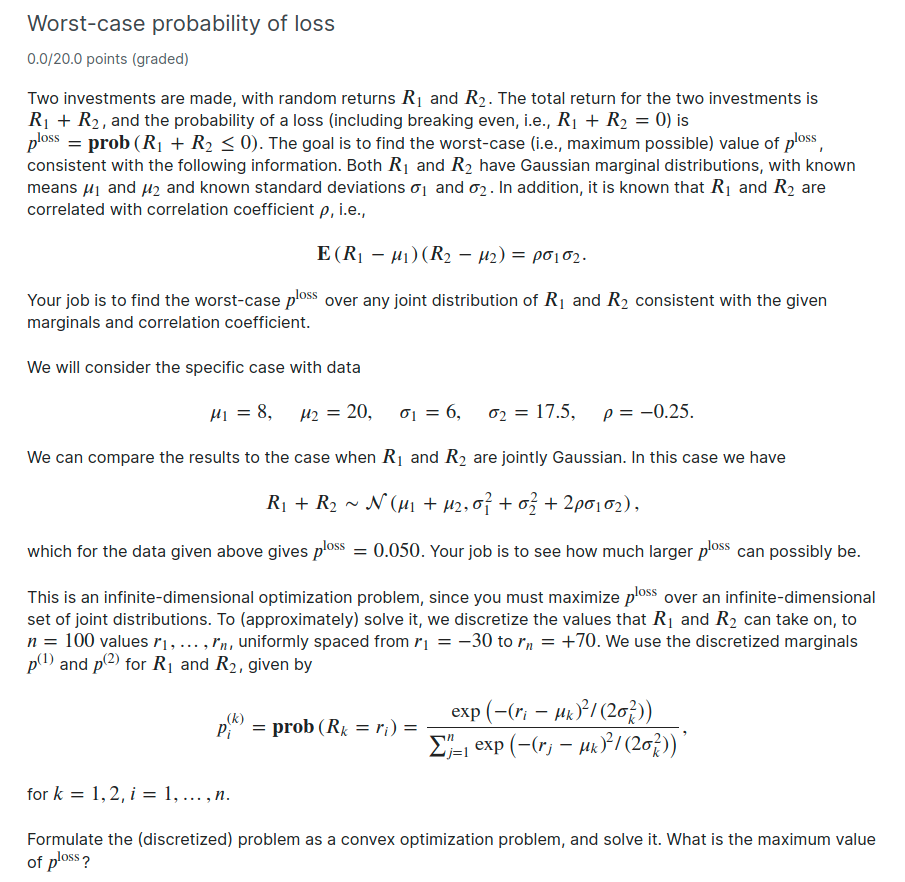

# Formulation

$p \in \mathbb{R}^{n*n}$

$\sum_i p(i,j) = M^{(1)}[j]$

$\sum_j p(i,j) = M^{(0)}[i]$

$E[R_1 R_2]  = \rho \sigma_1 \sigma_2 + \mu_1 \mu_2$

$\sum_{i,j} p(i,j) r[i]r[j] = \rho \sigma_1 \sigma_2 + \mu_1 \mu_2$

# Problem data

In [2]:
mu = [8, 20]
s = [6, 17.5]
rho = -0.25
n = 100
r = np.linspace(-30, 70, n)
marginal = [None, None]
for i in range(2):
    mi = np.exp(-((r-mu[i])**2)/(2*(s[i]**2)))
    mi /= mi.sum()
    marginal[i] = mi
    
r_mul_ij = r.reshape(-1,1) @ r.reshape(1,-1)
r_sum_ij = r.reshape(-1,1) + r.reshape(1,-1)

# Solving

In [3]:
p = cp.Variable((n,n), nonneg = True)

p_loss = cp.sum(p[r_sum_ij <= 0])
obj = cp.Maximize(p_loss)

C = [
    cp.sum(p, axis = 0) == marginal[0],
    cp.sum(p, axis = 1) == marginal[1],
    # correlation
    cp.sum(cp.multiply(r_mul_ij, p)) == rho*s[0]*s[1] + mu[0]*mu[1]
]

prob = cp.Problem(obj, C)
prob.solve()
assert prob.status == cp.OPTIMAL
print('max p_loss = ',prob.value)
p_ans = p.value

max p_loss =  0.19203645969850436


In [4]:
# ((p_ans*r_mul_ij).sum() - mu[0]*mu[1])/(s[0]*s[1])

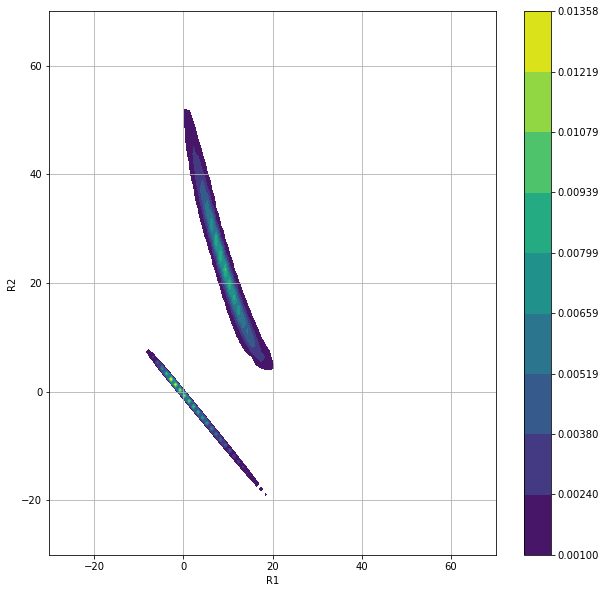

In [5]:
fig, ax = plt.subplots(figsize = (10,10))
cs = ax.contourf(r, r, p_ans, np.linspace(1e-3, p_ans.max(), 10))
# ax.clabel(cs, fontsize=9, inline=1)
ax.grid()
ax.set_xlabel('R1')
ax.set_ylabel('R2')
cbar = fig.colorbar(cs)
plt.show()
